In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [109]:
clin = pd.read_csv("data_clinical_patient.txt", sep="\t", engine='python', header=None)

# Data Cleaning

In [110]:
clin.head(20)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,#Patient Identifier,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,Cohort,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,...,Age at Diagnosis,Overall Survival (Months),Overall Survival Status,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Patient's Vital Status,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery
1,#Identifier to uniquely specify a patient.,Number of lymphnodes positive,Nottingham prognostic index,Tumor Content,Chemotherapy.,Cohort.,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,...,Age at Diagnosis,Overall survival in months since initial diago...,Overall patient survival status.,Pam50 + Claudin-low subtype,3-Gene classifier subtype,The survival state of the person.,"For tumors in paired organs, designates the si...",Radio Therapy,Text to describe a tumor's histologic subtype ...,Type of Breast Surgery
2,#STRING,STRING,NUMBER,STRING,STRING,STRING,STRING,STRING,STRING,STRING,...,NUMBER,NUMBER,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING
3,#1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,...,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
5,MB-0000,10,6.044,NaN,NO,1,Positve,NEUTRAL,YES,Post,...,75.65,140.5,0:LIVING,claudin-low,ER-/HER2-,Living,Right,YES,Ductal/NST,MASTECTOMY
6,MB-0002,0,4.02,High,NO,1,Positve,NEUTRAL,YES,Pre,...,43.19,84.63333333,0:LIVING,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING
7,MB-0005,1,4.03,High,YES,1,Positve,NEUTRAL,YES,Pre,...,48.87,163.7,1:DECEASED,LumB,NaN,Died of Disease,Right,NO,Ductal/NST,MASTECTOMY
8,MB-0006,3,4.05,Moderate,YES,1,Positve,NEUTRAL,YES,Pre,...,47.68,164.9333333,0:LIVING,LumB,NaN,Living,Right,YES,Mixed,MASTECTOMY
9,MB-0008,8,6.08,High,YES,1,Positve,NEUTRAL,YES,Post,...,76.97,41.36666667,1:DECEASED,LumB,ER+/HER2- High Prolif,Died of Disease,Right,YES,Mixed,MASTECTOMY


In [111]:
clin.shape

(2514, 22)

In [112]:
clin.drop(clin.index[0:4], inplace = True)


In [113]:
clin

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,...,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
5,MB-0000,10,6.044,NaN,NO,1,Positve,NEUTRAL,YES,Post,...,75.65,140.5,0:LIVING,claudin-low,ER-/HER2-,Living,Right,YES,Ductal/NST,MASTECTOMY
6,MB-0002,0,4.02,High,NO,1,Positve,NEUTRAL,YES,Pre,...,43.19,84.63333333,0:LIVING,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING
7,MB-0005,1,4.03,High,YES,1,Positve,NEUTRAL,YES,Pre,...,48.87,163.7,1:DECEASED,LumB,NaN,Died of Disease,Right,NO,Ductal/NST,MASTECTOMY
8,MB-0006,3,4.05,Moderate,YES,1,Positve,NEUTRAL,YES,Pre,...,47.68,164.9333333,0:LIVING,LumB,NaN,Living,Right,YES,Mixed,MASTECTOMY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,MTS-T2428,0,2.54,NaN,NaN,1,Positve,NaN,NaN,NaN,...,70.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2510,MTS-T2429,0,4.56,NaN,NaN,1,Positve,NaN,NaN,NaN,...,63.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2511,MTS-T2430,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2512,MTS-T2431,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
clin.columns = clin.iloc[0]

In [115]:
clin

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,...,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,...,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
5,MB-0000,10,6.044,NaN,NO,1,Positve,NEUTRAL,YES,Post,...,75.65,140.5,0:LIVING,claudin-low,ER-/HER2-,Living,Right,YES,Ductal/NST,MASTECTOMY
6,MB-0002,0,4.02,High,NO,1,Positve,NEUTRAL,YES,Pre,...,43.19,84.63333333,0:LIVING,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING
7,MB-0005,1,4.03,High,YES,1,Positve,NEUTRAL,YES,Pre,...,48.87,163.7,1:DECEASED,LumB,NaN,Died of Disease,Right,NO,Ductal/NST,MASTECTOMY
8,MB-0006,3,4.05,Moderate,YES,1,Positve,NEUTRAL,YES,Pre,...,47.68,164.9333333,0:LIVING,LumB,NaN,Living,Right,YES,Mixed,MASTECTOMY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,MTS-T2428,0,2.54,NaN,NaN,1,Positve,NaN,NaN,NaN,...,70.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2510,MTS-T2429,0,4.56,NaN,NaN,1,Positve,NaN,NaN,NaN,...,63.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2511,MTS-T2430,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2512,MTS-T2431,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
clin.drop(clin.index[0], inplace = True)
clin

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,...,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
5,MB-0000,10,6.044,NaN,NO,1,Positve,NEUTRAL,YES,Post,...,75.65,140.5,0:LIVING,claudin-low,ER-/HER2-,Living,Right,YES,Ductal/NST,MASTECTOMY
6,MB-0002,0,4.02,High,NO,1,Positve,NEUTRAL,YES,Pre,...,43.19,84.63333333,0:LIVING,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING
7,MB-0005,1,4.03,High,YES,1,Positve,NEUTRAL,YES,Pre,...,48.87,163.7,1:DECEASED,LumB,NaN,Died of Disease,Right,NO,Ductal/NST,MASTECTOMY
8,MB-0006,3,4.05,Moderate,YES,1,Positve,NEUTRAL,YES,Pre,...,47.68,164.9333333,0:LIVING,LumB,NaN,Living,Right,YES,Mixed,MASTECTOMY
9,MB-0008,8,6.08,High,YES,1,Positve,NEUTRAL,YES,Post,...,76.97,41.36666667,1:DECEASED,LumB,ER+/HER2- High Prolif,Died of Disease,Right,YES,Mixed,MASTECTOMY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,MTS-T2428,0,2.54,NaN,NaN,1,Positve,NaN,NaN,NaN,...,70.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2510,MTS-T2429,0,4.56,NaN,NaN,1,Positve,NaN,NaN,NaN,...,63.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2511,MTS-T2430,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2512,MTS-T2431,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
clin.reset_index(drop=True, inplace=True)

In [118]:
clin

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,...,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
0,MB-0000,10,6.044,NaN,NO,1,Positve,NEUTRAL,YES,Post,...,75.65,140.5,0:LIVING,claudin-low,ER-/HER2-,Living,Right,YES,Ductal/NST,MASTECTOMY
1,MB-0002,0,4.02,High,NO,1,Positve,NEUTRAL,YES,Pre,...,43.19,84.63333333,0:LIVING,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING
2,MB-0005,1,4.03,High,YES,1,Positve,NEUTRAL,YES,Pre,...,48.87,163.7,1:DECEASED,LumB,NaN,Died of Disease,Right,NO,Ductal/NST,MASTECTOMY
3,MB-0006,3,4.05,Moderate,YES,1,Positve,NEUTRAL,YES,Pre,...,47.68,164.9333333,0:LIVING,LumB,NaN,Living,Right,YES,Mixed,MASTECTOMY
4,MB-0008,8,6.08,High,YES,1,Positve,NEUTRAL,YES,Post,...,76.97,41.36666667,1:DECEASED,LumB,ER+/HER2- High Prolif,Died of Disease,Right,YES,Mixed,MASTECTOMY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,0,2.54,NaN,NaN,1,Positve,NaN,NaN,NaN,...,70.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2505,MTS-T2429,0,4.56,NaN,NaN,1,Positve,NaN,NaN,NaN,...,63.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2506,MTS-T2430,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,MTS-T2431,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
clin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   PATIENT_ID                     2509 non-null   object
 1   LYMPH_NODES_EXAMINED_POSITIVE  2243 non-null   object
 2   NPI                            2287 non-null   object
 3   CELLULARITY                    1917 non-null   object
 4   CHEMOTHERAPY                   1980 non-null   object
 5   COHORT                         2498 non-null   object
 6   ER_IHC                         2426 non-null   object
 7   HER2_SNP6                      1980 non-null   object
 8   HORMONE_THERAPY                1980 non-null   object
 9   INFERRED_MENOPAUSAL_STATE      1980 non-null   object
 10  SEX                            2509 non-null   object
 11  INTCLUST                       1980 non-null   object
 12  AGE_AT_DIAGNOSIS               2498 non-null   object
 13  OS_

In [120]:
clin.COHORT.describe()

count     2498
unique       9
top          1
freq       809
Name: COHORT, dtype: object

In [121]:
clin.drop("COHORT", axis=1, inplace=True)

In [122]:
clin.drop("LATERALITY", axis=1, inplace=True)

In [123]:
clin

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,SEX,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
0,MB-0000,10,6.044,NaN,NO,Positve,NEUTRAL,YES,Post,Female,4ER+,75.65,140.5,0:LIVING,claudin-low,ER-/HER2-,Living,YES,Ductal/NST,MASTECTOMY
1,MB-0002,0,4.02,High,NO,Positve,NEUTRAL,YES,Pre,Female,4ER+,43.19,84.63333333,0:LIVING,LumA,ER+/HER2- High Prolif,Living,YES,Ductal/NST,BREAST CONSERVING
2,MB-0005,1,4.03,High,YES,Positve,NEUTRAL,YES,Pre,Female,3,48.87,163.7,1:DECEASED,LumB,NaN,Died of Disease,NO,Ductal/NST,MASTECTOMY
3,MB-0006,3,4.05,Moderate,YES,Positve,NEUTRAL,YES,Pre,Female,9,47.68,164.9333333,0:LIVING,LumB,NaN,Living,YES,Mixed,MASTECTOMY
4,MB-0008,8,6.08,High,YES,Positve,NEUTRAL,YES,Post,Female,9,76.97,41.36666667,1:DECEASED,LumB,ER+/HER2- High Prolif,Died of Disease,YES,Mixed,MASTECTOMY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,0,2.54,NaN,NaN,Positve,NaN,NaN,NaN,Female,NaN,70.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2505,MTS-T2429,0,4.56,NaN,NaN,Positve,NaN,NaN,NaN,Female,NaN,63.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2506,MTS-T2430,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,MTS-T2431,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
clin.VITAL_STATUS.describe()

count       1980
unique         3
top       Living
freq         837
Name: VITAL_STATUS, dtype: object

In [125]:
clin.VITAL_STATUS.value_counts()

Living                  837
Died of Disease         646
Died of Other Causes    497
Name: VITAL_STATUS, dtype: int64

In [126]:
clin.OS_STATUS.value_counts()

1:DECEASED    1144
0:LIVING       837
Name: OS_STATUS, dtype: int64

In [127]:
clin.drop("OS_STATUS", axis=1, inplace=True)

In [128]:
clin

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,SEX,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
0,MB-0000,10,6.044,NaN,NO,Positve,NEUTRAL,YES,Post,Female,4ER+,75.65,140.5,claudin-low,ER-/HER2-,Living,YES,Ductal/NST,MASTECTOMY
1,MB-0002,0,4.02,High,NO,Positve,NEUTRAL,YES,Pre,Female,4ER+,43.19,84.63333333,LumA,ER+/HER2- High Prolif,Living,YES,Ductal/NST,BREAST CONSERVING
2,MB-0005,1,4.03,High,YES,Positve,NEUTRAL,YES,Pre,Female,3,48.87,163.7,LumB,NaN,Died of Disease,NO,Ductal/NST,MASTECTOMY
3,MB-0006,3,4.05,Moderate,YES,Positve,NEUTRAL,YES,Pre,Female,9,47.68,164.9333333,LumB,NaN,Living,YES,Mixed,MASTECTOMY
4,MB-0008,8,6.08,High,YES,Positve,NEUTRAL,YES,Post,Female,9,76.97,41.36666667,LumB,ER+/HER2- High Prolif,Died of Disease,YES,Mixed,MASTECTOMY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,0,2.54,NaN,NaN,Positve,NaN,NaN,NaN,Female,NaN,70.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2505,MTS-T2429,0,4.56,NaN,NaN,Positve,NaN,NaN,NaN,Female,NaN,63.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2506,MTS-T2430,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,MTS-T2431,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
clin.SEX.value_counts()

Female    2509
Name: SEX, dtype: int64

In [130]:
clin.drop("SEX", axis=1, inplace=True)

In [131]:
clin

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
0,MB-0000,10,6.044,NaN,NO,Positve,NEUTRAL,YES,Post,4ER+,75.65,140.5,claudin-low,ER-/HER2-,Living,YES,Ductal/NST,MASTECTOMY
1,MB-0002,0,4.02,High,NO,Positve,NEUTRAL,YES,Pre,4ER+,43.19,84.63333333,LumA,ER+/HER2- High Prolif,Living,YES,Ductal/NST,BREAST CONSERVING
2,MB-0005,1,4.03,High,YES,Positve,NEUTRAL,YES,Pre,3,48.87,163.7,LumB,NaN,Died of Disease,NO,Ductal/NST,MASTECTOMY
3,MB-0006,3,4.05,Moderate,YES,Positve,NEUTRAL,YES,Pre,9,47.68,164.9333333,LumB,NaN,Living,YES,Mixed,MASTECTOMY
4,MB-0008,8,6.08,High,YES,Positve,NEUTRAL,YES,Post,9,76.97,41.36666667,LumB,ER+/HER2- High Prolif,Died of Disease,YES,Mixed,MASTECTOMY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,0,2.54,NaN,NaN,Positve,NaN,NaN,NaN,NaN,70.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2505,MTS-T2429,0,4.56,NaN,NaN,Positve,NaN,NaN,NaN,NaN,63.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2506,MTS-T2430,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,MTS-T2431,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
clin.CHEMOTHERAPY.value_counts()

NO     1568
YES     412
Name: CHEMOTHERAPY, dtype: int64

In [133]:
clin.CELLULARITY.value_counts()

High        965
Moderate    737
Low         215
Name: CELLULARITY, dtype: int64

In [134]:
clin.ER_IHC.value_counts()

Positve     1817
Negative     609
Name: ER_IHC, dtype: int64

In [135]:
clin.HER2_SNP6.value_counts()

NEUTRAL    1436
GAIN        438
LOSS        101
UNDEF         5
Name: HER2_SNP6, dtype: int64

In [136]:
clin.HORMONE_THERAPY.value_counts()

YES    1216
NO      764
Name: HORMONE_THERAPY, dtype: int64

In [137]:
clin.INFERRED_MENOPAUSAL_STATE.value_counts()

Post    1556
Pre      424
Name: INFERRED_MENOPAUSAL_STATE, dtype: int64

In [138]:
clin.CLAUDIN_SUBTYPE.value_counts()

LumA           700
LumB           475
Her2           224
claudin-low    218
Basal          209
Normal         148
NC               6
Name: CLAUDIN_SUBTYPE, dtype: int64

In [139]:
clin.THREEGENE.value_counts()

ER+/HER2- Low Prolif     640
ER+/HER2- High Prolif    617
ER-/HER2-                309
HER2+                    198
Name: THREEGENE, dtype: int64

In [140]:
clin.RADIO_THERAPY.value_counts()

YES    1173
NO      807
Name: RADIO_THERAPY, dtype: int64

In [141]:
clin.HISTOLOGICAL_SUBTYPE.value_counts()

Ductal/NST             1810
Mixed                   269
Lobular                 192
Medullary                32
Mucinous                 25
Tubular/ cribriform      23
Other                    21
Metaplastic               2
Name: HISTOLOGICAL_SUBTYPE, dtype: int64

In [142]:
clin.BREAST_SURGERY.value_counts()

MASTECTOMY           1170
BREAST CONSERVING     785
Name: BREAST_SURGERY, dtype: int64

In [143]:
clin.VITAL_STATUS.value_counts()

Living                  837
Died of Disease         646
Died of Other Causes    497
Name: VITAL_STATUS, dtype: int64

In [144]:
clin.VITAL_STATUS.replace(to_replace = "Living", value = 0, inplace = True)

In [145]:
clin.VITAL_STATUS.replace(to_replace = "Died of Other Causes", value = 0, inplace = True)

In [146]:
clin.VITAL_STATUS.replace(to_replace = "Died of Disease", value = 1, inplace = True)

In [147]:
clin

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
0,MB-0000,10,6.044,NaN,NO,Positve,NEUTRAL,YES,Post,4ER+,75.65,140.5,claudin-low,ER-/HER2-,0.0,YES,Ductal/NST,MASTECTOMY
1,MB-0002,0,4.02,High,NO,Positve,NEUTRAL,YES,Pre,4ER+,43.19,84.63333333,LumA,ER+/HER2- High Prolif,0.0,YES,Ductal/NST,BREAST CONSERVING
2,MB-0005,1,4.03,High,YES,Positve,NEUTRAL,YES,Pre,3,48.87,163.7,LumB,NaN,1.0,NO,Ductal/NST,MASTECTOMY
3,MB-0006,3,4.05,Moderate,YES,Positve,NEUTRAL,YES,Pre,9,47.68,164.9333333,LumB,NaN,0.0,YES,Mixed,MASTECTOMY
4,MB-0008,8,6.08,High,YES,Positve,NEUTRAL,YES,Post,9,76.97,41.36666667,LumB,ER+/HER2- High Prolif,1.0,YES,Mixed,MASTECTOMY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,0,2.54,NaN,NaN,Positve,NaN,NaN,NaN,NaN,70.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2505,MTS-T2429,0,4.56,NaN,NaN,Positve,NaN,NaN,NaN,NaN,63.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2506,MTS-T2430,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,MTS-T2431,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
clin.VITAL_STATUS.value_counts()

0.0    1334
1.0     646
Name: VITAL_STATUS, dtype: int64

In [149]:
clin.rename(columns = {"VITAL_STATUS":"DOD"}, inplace = True) 
   

In [150]:
clin

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,DOD,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
0,MB-0000,10,6.044,NaN,NO,Positve,NEUTRAL,YES,Post,4ER+,75.65,140.5,claudin-low,ER-/HER2-,0.0,YES,Ductal/NST,MASTECTOMY
1,MB-0002,0,4.02,High,NO,Positve,NEUTRAL,YES,Pre,4ER+,43.19,84.63333333,LumA,ER+/HER2- High Prolif,0.0,YES,Ductal/NST,BREAST CONSERVING
2,MB-0005,1,4.03,High,YES,Positve,NEUTRAL,YES,Pre,3,48.87,163.7,LumB,NaN,1.0,NO,Ductal/NST,MASTECTOMY
3,MB-0006,3,4.05,Moderate,YES,Positve,NEUTRAL,YES,Pre,9,47.68,164.9333333,LumB,NaN,0.0,YES,Mixed,MASTECTOMY
4,MB-0008,8,6.08,High,YES,Positve,NEUTRAL,YES,Post,9,76.97,41.36666667,LumB,ER+/HER2- High Prolif,1.0,YES,Mixed,MASTECTOMY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,0,2.54,NaN,NaN,Positve,NaN,NaN,NaN,NaN,70.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2505,MTS-T2429,0,4.56,NaN,NaN,Positve,NaN,NaN,NaN,NaN,63.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2506,MTS-T2430,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2507,MTS-T2431,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
clin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PATIENT_ID                     2509 non-null   object 
 1   LYMPH_NODES_EXAMINED_POSITIVE  2243 non-null   object 
 2   NPI                            2287 non-null   object 
 3   CELLULARITY                    1917 non-null   object 
 4   CHEMOTHERAPY                   1980 non-null   object 
 5   ER_IHC                         2426 non-null   object 
 6   HER2_SNP6                      1980 non-null   object 
 7   HORMONE_THERAPY                1980 non-null   object 
 8   INFERRED_MENOPAUSAL_STATE      1980 non-null   object 
 9   INTCLUST                       1980 non-null   object 
 10  AGE_AT_DIAGNOSIS               2498 non-null   object 
 11  OS_MONTHS                      1981 non-null   object 
 12  CLAUDIN_SUBTYPE                1980 non-null   o

In [152]:
clin.dropna(inplace = True)

In [153]:
clin

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,DOD,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
1,MB-0002,0,4.02,High,NO,Positve,NEUTRAL,YES,Pre,4ER+,43.19,84.63333333,LumA,ER+/HER2- High Prolif,0.0,YES,Ductal/NST,BREAST CONSERVING
4,MB-0008,8,6.08,High,YES,Positve,NEUTRAL,YES,Post,9,76.97,41.36666667,LumB,ER+/HER2- High Prolif,1.0,YES,Mixed,MASTECTOMY
5,MB-0010,0,4.062,Moderate,NO,Positve,NEUTRAL,YES,Post,7,78.77,7.8,LumB,ER+/HER2- High Prolif,1.0,YES,Ductal/NST,MASTECTOMY
10,MB-0028,1,5.032,Moderate,NO,Positve,GAIN,YES,Post,9,86.41,36.56666667,LumB,ER+/HER2- High Prolif,0.0,YES,Ductal/NST,BREAST CONSERVING
11,MB-0035,0,3.056,High,NO,Negative,LOSS,NO,Post,3,84.22,36.26666667,Her2,ER+/HER2- High Prolif,1.0,NO,Lobular,MASTECTOMY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,MB-7293,1,5.09,High,NO,Positve,NEUTRAL,YES,Post,3,56.9,199.2333333,LumA,ER+/HER2- Low Prolif,0.0,NO,Ductal/NST,MASTECTOMY
1979,MB-7294,1,4.03,High,NO,Positve,GAIN,YES,Post,1,59.2,82.73333333,LumB,ER+/HER2- High Prolif,1.0,NO,Ductal/NST,MASTECTOMY
1980,MB-7295,1,5.05,High,NO,Positve,NEUTRAL,YES,Pre,3,43.1,196.8666667,LumA,ER+/HER2- Low Prolif,0.0,YES,Lobular,BREAST CONSERVING
1983,MB-7298,12,5.05,Moderate,NO,Positve,NEUTRAL,YES,Post,1,61.16,86.23333333,LumB,ER+/HER2- High Prolif,0.0,NO,Ductal/NST,MASTECTOMY


In [154]:
clin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 1 to 1984
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PATIENT_ID                     1597 non-null   object 
 1   LYMPH_NODES_EXAMINED_POSITIVE  1597 non-null   object 
 2   NPI                            1597 non-null   object 
 3   CELLULARITY                    1597 non-null   object 
 4   CHEMOTHERAPY                   1597 non-null   object 
 5   ER_IHC                         1597 non-null   object 
 6   HER2_SNP6                      1597 non-null   object 
 7   HORMONE_THERAPY                1597 non-null   object 
 8   INFERRED_MENOPAUSAL_STATE      1597 non-null   object 
 9   INTCLUST                       1597 non-null   object 
 10  AGE_AT_DIAGNOSIS               1597 non-null   object 
 11  OS_MONTHS                      1597 non-null   object 
 12  CLAUDIN_SUBTYPE                1597 non-null   o

In [155]:
clin["LYMPH_NODES_EXAMINED_POSITIVE"] = clin["LYMPH_NODES_EXAMINED_POSITIVE"].astype(str).astype(int)

In [156]:
clin["NPI"] = clin["NPI"].astype(str).astype(float)

In [157]:
clin["AGE_AT_DIAGNOSIS"] = clin["AGE_AT_DIAGNOSIS"].astype(str).astype(float)

In [158]:
clin["OS_MONTHS"] = clin["OS_MONTHS"].astype(str).astype(float).round(2)

In [159]:
clin["DOD"] = clin["DOD"].astype(int)

In [160]:
clin.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 1 to 1984
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PATIENT_ID                     1597 non-null   object 
 1   LYMPH_NODES_EXAMINED_POSITIVE  1597 non-null   int32  
 2   NPI                            1597 non-null   float64
 3   CELLULARITY                    1597 non-null   object 
 4   CHEMOTHERAPY                   1597 non-null   object 
 5   ER_IHC                         1597 non-null   object 
 6   HER2_SNP6                      1597 non-null   object 
 7   HORMONE_THERAPY                1597 non-null   object 
 8   INFERRED_MENOPAUSAL_STATE      1597 non-null   object 
 9   INTCLUST                       1597 non-null   object 
 10  AGE_AT_DIAGNOSIS               1597 non-null   float64
 11  OS_MONTHS                      1597 non-null   float64
 12  CLAUDIN_SUBTYPE                1597 non-null   o

In [161]:
clin.INTCLUST.value_counts()

8       248
3       247
4ER+    200
10      170
5       156
7       153
9       123
1       107
6        72
2        63
4ER-     58
Name: INTCLUST, dtype: int64

In [162]:
# Inclust classification is based om molecular profiling/ gene expression
# it is strong predictor of pathological complete response
# directly related to the disease free survival
# It has 10 classes and numbers have nothing to do with
# However I decided to keep ER classificator too since we might otherwise remove important data
# because ER, estrogene receptor expression is a predictive factor as well

In [163]:
clin

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,DOD,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY
1,MB-0002,0,4.020,High,NO,Positve,NEUTRAL,YES,Pre,4ER+,43.19,84.63,LumA,ER+/HER2- High Prolif,0,YES,Ductal/NST,BREAST CONSERVING
4,MB-0008,8,6.080,High,YES,Positve,NEUTRAL,YES,Post,9,76.97,41.37,LumB,ER+/HER2- High Prolif,1,YES,Mixed,MASTECTOMY
5,MB-0010,0,4.062,Moderate,NO,Positve,NEUTRAL,YES,Post,7,78.77,7.80,LumB,ER+/HER2- High Prolif,1,YES,Ductal/NST,MASTECTOMY
10,MB-0028,1,5.032,Moderate,NO,Positve,GAIN,YES,Post,9,86.41,36.57,LumB,ER+/HER2- High Prolif,0,YES,Ductal/NST,BREAST CONSERVING
11,MB-0035,0,3.056,High,NO,Negative,LOSS,NO,Post,3,84.22,36.27,Her2,ER+/HER2- High Prolif,1,NO,Lobular,MASTECTOMY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,MB-7293,1,5.090,High,NO,Positve,NEUTRAL,YES,Post,3,56.90,199.23,LumA,ER+/HER2- Low Prolif,0,NO,Ductal/NST,MASTECTOMY
1979,MB-7294,1,4.030,High,NO,Positve,GAIN,YES,Post,1,59.20,82.73,LumB,ER+/HER2- High Prolif,1,NO,Ductal/NST,MASTECTOMY
1980,MB-7295,1,5.050,High,NO,Positve,NEUTRAL,YES,Pre,3,43.10,196.87,LumA,ER+/HER2- Low Prolif,0,YES,Lobular,BREAST CONSERVING
1983,MB-7298,12,5.050,Moderate,NO,Positve,NEUTRAL,YES,Post,1,61.16,86.23,LumB,ER+/HER2- High Prolif,0,NO,Ductal/NST,MASTECTOMY


In [164]:
# I drop columns related to the treatment since model will be based on predictions 
# based on clinical data and histological/ molecular diagnistic data

In [165]:
clin.drop("RADIO_THERAPY", axis=1, inplace=True)

In [166]:
clin.drop("BREAST_SURGERY", axis=1, inplace=True)

In [167]:
clin.drop("HORMONE_THERAPY", axis=1, inplace=True)

In [168]:
clin.drop("CHEMOTHERAPY", axis=1, inplace=True)

In [169]:
clin.head()

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,ER_IHC,HER2_SNP6,INFERRED_MENOPAUSAL_STATE,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,DOD,HISTOLOGICAL_SUBTYPE
1,MB-0002,0,4.020,High,Positve,NEUTRAL,Pre,4ER+,43.19,84.63,LumA,ER+/HER2- High Prolif,0,Ductal/NST
4,MB-0008,8,6.080,High,Positve,NEUTRAL,Post,9,76.97,41.37,LumB,ER+/HER2- High Prolif,1,Mixed
5,MB-0010,0,4.062,Moderate,Positve,NEUTRAL,Post,7,78.77,7.80,LumB,ER+/HER2- High Prolif,1,Ductal/NST
10,MB-0028,1,5.032,Moderate,Positve,GAIN,Post,9,86.41,36.57,LumB,ER+/HER2- High Prolif,0,Ductal/NST
11,MB-0035,0,3.056,High,Negative,LOSS,Post,3,84.22,36.27,Her2,ER+/HER2- High Prolif,1,Lobular


In [170]:
clin.rename(columns = {4:"index"}, inplace = True) 


In [171]:
clin.index.name

In [172]:
clin.head()

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,ER_IHC,HER2_SNP6,INFERRED_MENOPAUSAL_STATE,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,DOD,HISTOLOGICAL_SUBTYPE
1,MB-0002,0,4.020,High,Positve,NEUTRAL,Pre,4ER+,43.19,84.63,LumA,ER+/HER2- High Prolif,0,Ductal/NST
4,MB-0008,8,6.080,High,Positve,NEUTRAL,Post,9,76.97,41.37,LumB,ER+/HER2- High Prolif,1,Mixed
5,MB-0010,0,4.062,Moderate,Positve,NEUTRAL,Post,7,78.77,7.80,LumB,ER+/HER2- High Prolif,1,Ductal/NST
10,MB-0028,1,5.032,Moderate,Positve,GAIN,Post,9,86.41,36.57,LumB,ER+/HER2- High Prolif,0,Ductal/NST
11,MB-0035,0,3.056,High,Negative,LOSS,Post,3,84.22,36.27,Her2,ER+/HER2- High Prolif,1,Lobular


In [173]:
clin.index

Int64Index([   1,    4,    5,   10,   11,   12,   17,   22,   25,   35,
            ...
            1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1983, 1984],
           dtype='int64', length=1597)

In [174]:
clin.reset_index(drop=True, inplace=True)

In [175]:
clin.INTCLUST.value_counts()

8       248
3       247
4ER+    200
10      170
5       156
7       153
9       123
1       107
6        72
2        63
4ER-     58
Name: INTCLUST, dtype: int64

In [176]:
clin.head()

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,ER_IHC,HER2_SNP6,INFERRED_MENOPAUSAL_STATE,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,DOD,HISTOLOGICAL_SUBTYPE
0,MB-0002,0,4.020,High,Positve,NEUTRAL,Pre,4ER+,43.19,84.63,LumA,ER+/HER2- High Prolif,0,Ductal/NST
1,MB-0008,8,6.080,High,Positve,NEUTRAL,Post,9,76.97,41.37,LumB,ER+/HER2- High Prolif,1,Mixed
2,MB-0010,0,4.062,Moderate,Positve,NEUTRAL,Post,7,78.77,7.80,LumB,ER+/HER2- High Prolif,1,Ductal/NST
3,MB-0028,1,5.032,Moderate,Positve,GAIN,Post,9,86.41,36.57,LumB,ER+/HER2- High Prolif,0,Ductal/NST
4,MB-0035,0,3.056,High,Negative,LOSS,Post,3,84.22,36.27,Her2,ER+/HER2- High Prolif,1,Lobular


### Checking for duplicates

In [177]:
clin[clin.duplicated(keep = "first")]

4,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,ER_IHC,HER2_SNP6,INFERRED_MENOPAUSAL_STATE,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,DOD,HISTOLOGICAL_SUBTYPE


In [178]:
clin.to_csv("clin.csv", index = False)

# EDA

In [2]:
clin = pd.read_csv("clin.csv")

In [3]:
clin.head()

,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,ER_IHC,HER2_SNP6,INFERRED_MENOPAUSAL_STATE,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,DOD,HISTOLOGICAL_SUBTYPE
0,MB-0002,0,4.020,High,Positve,NEUTRAL,Pre,4ER+,43.19,84.63,LumA,ER+/HER2- High Prolif,0,Ductal/NST
1,MB-0008,8,6.080,High,Positve,NEUTRAL,Post,9,76.97,41.37,LumB,ER+/HER2- High Prolif,1,Mixed
2,MB-0010,0,4.062,Moderate,Positve,NEUTRAL,Post,7,78.77,7.80,LumB,ER+/HER2- High Prolif,1,Ductal/NST
3,MB-0028,1,5.032,Moderate,Positve,GAIN,Post,9,86.41,36.57,LumB,ER+/HER2- High Prolif,0,Ductal/NST
4,MB-0035,0,3.056,High,Negative,LOSS,Post,3,84.22,36.27,Her2,ER+/HER2- High Prolif,1,Lobular


### Correlation matrix

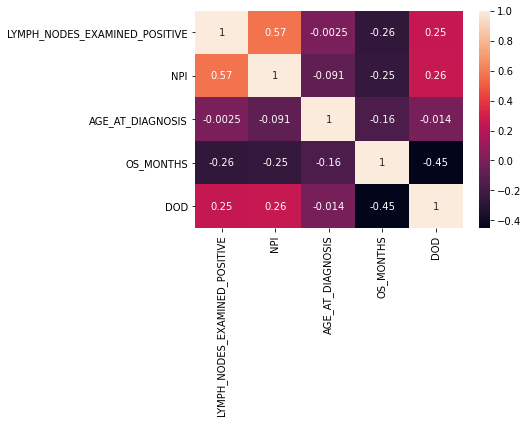

In [4]:
sns.heatmap(clin.corr(), annot = True)
plt.show()

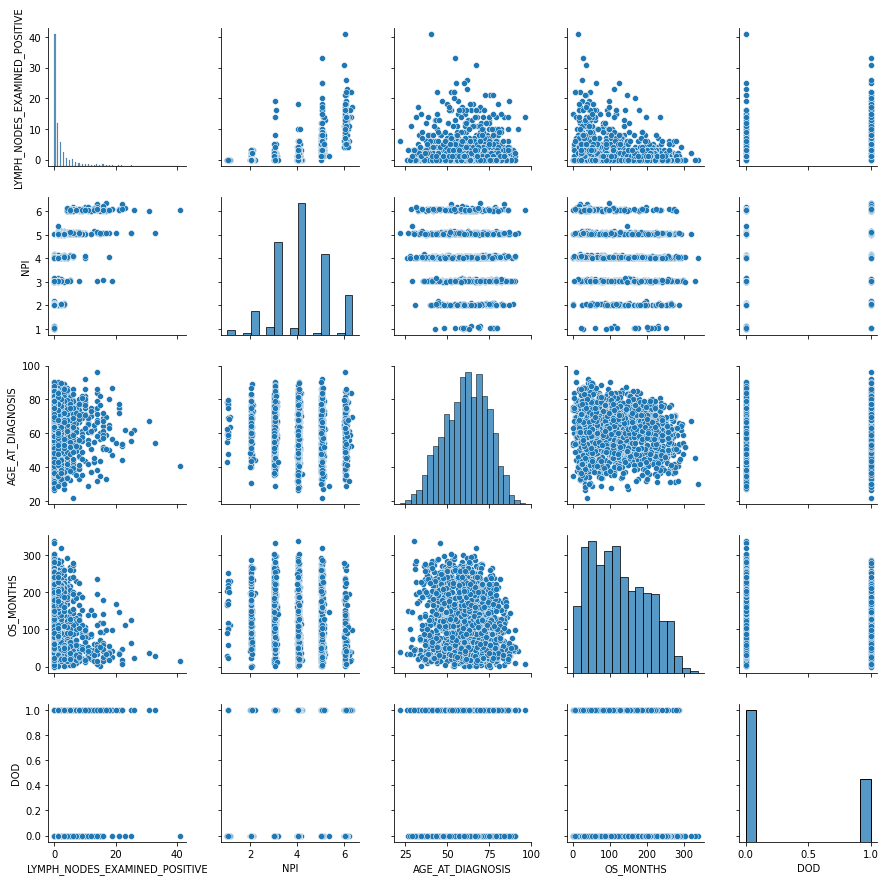

In [5]:
sns.pairplot(clin)
plt.show()

In [6]:
clin.columns

Index(['PATIENT_ID', 'LYMPH_NODES_EXAMINED_POSITIVE', 'NPI', 'CELLULARITY',
       'ER_IHC', 'HER2_SNP6', 'INFERRED_MENOPAUSAL_STATE', 'INTCLUST',
       'AGE_AT_DIAGNOSIS', 'OS_MONTHS', 'CLAUDIN_SUBTYPE', 'THREEGENE', 'DOD',
       'HISTOLOGICAL_SUBTYPE'],
      dtype='object')

In [7]:
clin_subset = clin[["LYMPH_NODES_EXAMINED_POSITIVE", "NPI", "AGE_AT_DIAGNOSIS",
                  "OS_MONTHS", "DOD"]]

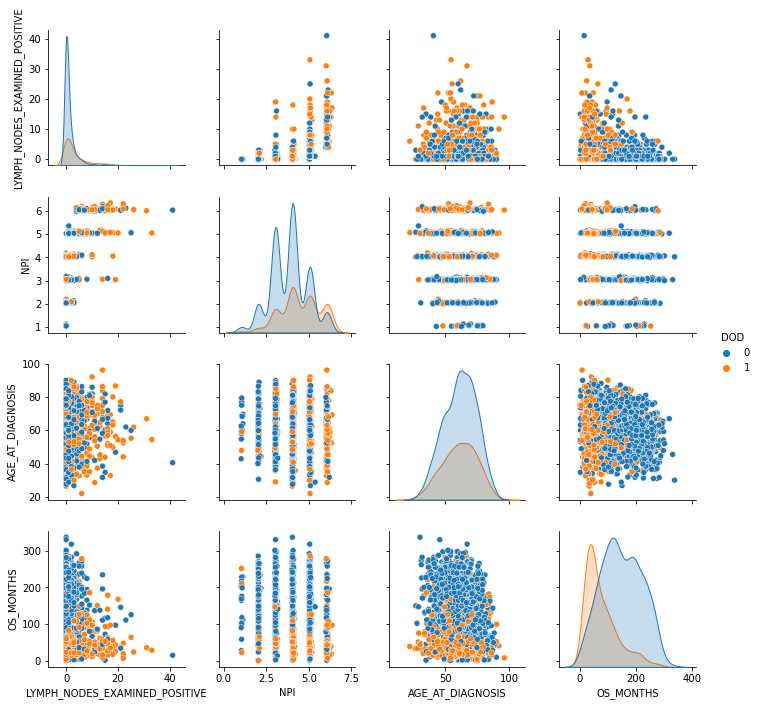

In [8]:
sns.pairplot(clin_subset, hue = "DOD")
plt.show()

### Profile

In [9]:
# !pip install pandas-profiling
from pandas_profiling import ProfileReport
ProfileReport(clin)

### Predictive power score

In [10]:
import ppscore as pps
ps_mat =pps.matrix(clin)

C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Vladi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Vladi\anaconda3\lib\site-packages\s

In [11]:
ps_mat

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,PATIENT_ID,PATIENT_ID,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,0.000000,feature_is_id,True,None,0.000000,0.000000,None
2,PATIENT_ID,NPI,0.000000,feature_is_id,True,None,0.000000,0.000000,None
3,PATIENT_ID,CELLULARITY,0.000000,feature_is_id,True,None,0.000000,0.000000,None
4,PATIENT_ID,ER_IHC,0.000000,feature_is_id,True,None,0.000000,0.000000,None
...,...,...,...,...,...,...,...,...,...
191,HISTOLOGICAL_SUBTYPE,OS_MONTHS,0.000000,regression,True,mean absolute error,63.128585,63.355274,DecisionTreeRegressor()
192,HISTOLOGICAL_SUBTYPE,CLAUDIN_SUBTYPE,0.001534,classification,True,weighted F1,0.236068,0.237240,DecisionTreeClassifier()
193,HISTOLOGICAL_SUBTYPE,THREEGENE,0.072920,classification,True,weighted F1,0.299311,0.350405,DecisionTreeClassifier()
194,HISTOLOGICAL_SUBTYPE,DOD,0.000000,regression,True,mean absolute error,0.324984,0.437690,DecisionTreeRegressor()


In [12]:
ps_mat_small = ps_mat.loc[ps_mat.ppscore > 0.4]
ps_mat_small.head()

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,PATIENT_ID,PATIENT_ID,1.0,predict_itself,True,None,0.0,1.0,None
15,LYMPH_NODES_EXAMINED_POSITIVE,LYMPH_NODES_EXAMINED_POSITIVE,1.0,predict_itself,True,None,0.0,1.0,None
30,NPI,NPI,1.0,predict_itself,True,None,0.0,1.0,None
45,CELLULARITY,CELLULARITY,1.0,predict_itself,True,None,0.0,1.0,None
60,ER_IHC,ER_IHC,1.0,predict_itself,True,None,0.0,1.0,None


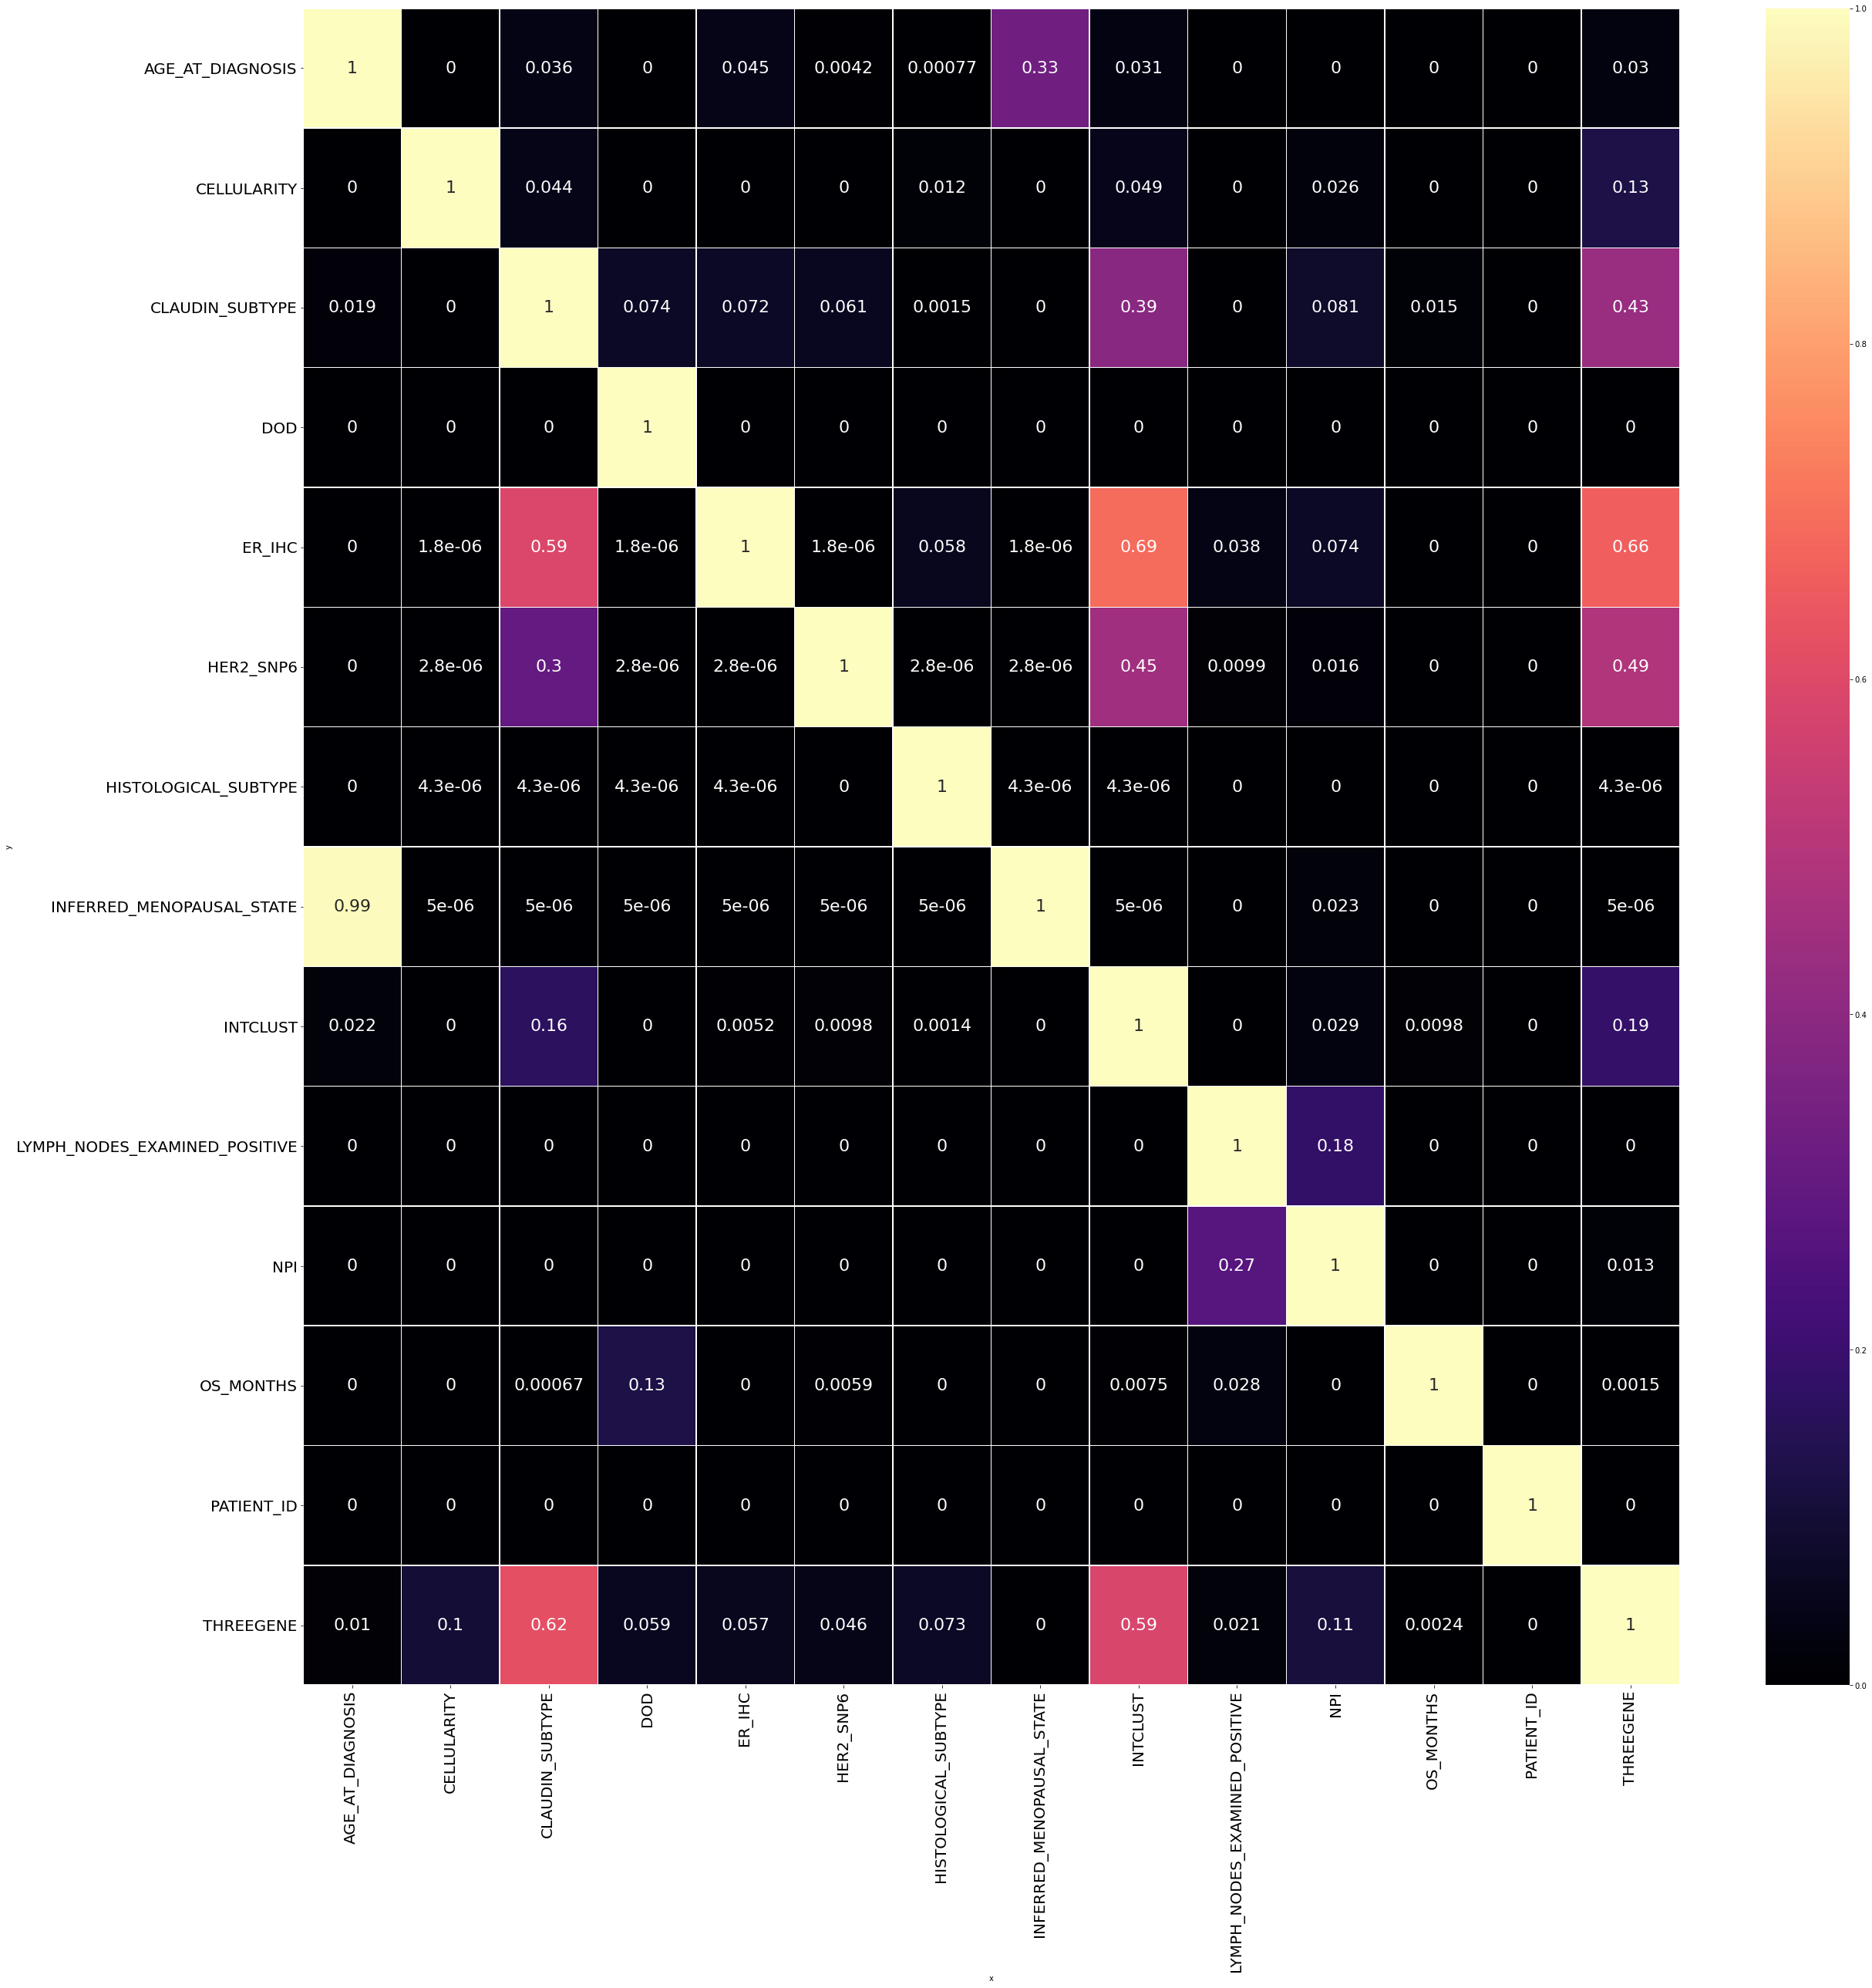

In [13]:
matrix_pps = ps_mat[['x','y','ppscore']].pivot(columns='x',index='y', values='ppscore')
plt.subplots(figsize = (40,40))

sns.heatmap(matrix_pps, vmin=0, vmax=1, cmap="magma",linewidths=0.5, annot = True, annot_kws={"size": 22})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

# Machine learning model

### Defining X and y

In [14]:
target_col = "DOD"

In [15]:
X = clin.drop(target_col, axis = 1)

y = clin[target_col]

In [16]:
X.drop("PATIENT_ID", axis = 1, inplace = True)

In [17]:
X

,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,ER_IHC,HER2_SNP6,INFERRED_MENOPAUSAL_STATE,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,CLAUDIN_SUBTYPE,THREEGENE,HISTOLOGICAL_SUBTYPE
0,0,4.020,High,Positve,NEUTRAL,Pre,4ER+,43.19,84.63,LumA,ER+/HER2- High Prolif,Ductal/NST
1,8,6.080,High,Positve,NEUTRAL,Post,9,76.97,41.37,LumB,ER+/HER2- High Prolif,Mixed
2,0,4.062,Moderate,Positve,NEUTRAL,Post,7,78.77,7.80,LumB,ER+/HER2- High Prolif,Ductal/NST
3,1,5.032,Moderate,Positve,GAIN,Post,9,86.41,36.57,LumB,ER+/HER2- High Prolif,Ductal/NST
4,0,3.056,High,Negative,LOSS,Post,3,84.22,36.27,Her2,ER+/HER2- High Prolif,Lobular
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,1,5.090,High,Positve,NEUTRAL,Post,3,56.90,199.23,LumA,ER+/HER2- Low Prolif,Ductal/NST
1593,1,4.030,High,Positve,GAIN,Post,1,59.20,82.73,LumB,ER+/HER2- High Prolif,Ductal/NST
1594,1,5.050,High,Positve,NEUTRAL,Pre,3,43.10,196.87,LumA,ER+/HER2- Low Prolif,Lobular
1595,12,5.050,Moderate,Positve,NEUTRAL,Post,1,61.16,86.23,LumB,ER+/HER2- High Prolif,Ductal/NST


In [18]:
y

0       0
1       1
2       1
3       0
4       1
       ..
1592    0
1593    1
1594    0
1595    0
1596    0
Name: DOD, Length: 1597, dtype: int64

In [19]:
X.select_dtypes("O").columns

Index(['CELLULARITY', 'ER_IHC', 'HER2_SNP6', 'INFERRED_MENOPAUSAL_STATE',
       'INTCLUST', 'CLAUDIN_SUBTYPE', 'THREEGENE', 'HISTOLOGICAL_SUBTYPE'],
      dtype='object')

In [20]:
X = pd.get_dummies(data=X, columns = ["CELLULARITY", "ER_IHC", "INFERRED_MENOPAUSAL_STATE",
                                     "INTCLUST", "HER2_SNP6", "CLAUDIN_SUBTYPE", "THREEGENE", "HISTOLOGICAL_SUBTYPE"], drop_first = True)

In [21]:
X

,LYMPH_NODES_EXAMINED_POSITIVE,NPI,AGE_AT_DIAGNOSIS,OS_MONTHS,CELLULARITY_Low,CELLULARITY_Moderate,ER_IHC_Positve,INFERRED_MENOPAUSAL_STATE_Pre,INTCLUST_10,INTCLUST_2,...,CLAUDIN_SUBTYPE_claudin-low,THREEGENE_ER+/HER2- Low Prolif,THREEGENE_ER-/HER2-,THREEGENE_HER2+,HISTOLOGICAL_SUBTYPE_Lobular,HISTOLOGICAL_SUBTYPE_Medullary,HISTOLOGICAL_SUBTYPE_Mixed,HISTOLOGICAL_SUBTYPE_Mucinous,HISTOLOGICAL_SUBTYPE_Other,HISTOLOGICAL_SUBTYPE_Tubular/ cribriform
0,0,4.020,43.19,84.63,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,6.080,76.97,41.37,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,4.062,78.77,7.80,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,5.032,86.41,36.57,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3.056,84.22,36.27,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,1,5.090,56.90,199.23,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1593,1,4.030,59.20,82.73,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1594,1,5.050,43.10,196.87,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1595,12,5.050,61.16,86.23,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Scaling

In [23]:
# Scaling: shall be done after split

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Training and evaluating (training data)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
# score on recall

In [25]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    LogisticRegression()
]

from sklearn.model_selection import cross_val_score
for classifier_model in classifiers:
    cv_result = cross_val_score(classifier_model, X_train, y_train, cv = 10, scoring = "recall")
    print(classifier_model, cv_result.mean())

DecisionTreeClassifier() 0.5928571428571429
RandomForestClassifier() 0.5261904761904762
KNeighborsClassifier() 0.4
SVC() 0.43571428571428567
GaussianNB() 0.6952380952380952
LogisticRegression() 0.5357142857142858


In [26]:
# cross val predict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred_cross = cross_val_predict(GaussianNB(), X_train, y_train, cv = 10)


cm = confusion_matrix(y_train, y_pred_cross)
print(cm)

[[448 409]
 [128 292]]


In [27]:
292 / (128 + 292)

0.6952380952380952

In [28]:
# Score on f1-score

In [29]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    
    LogisticRegression()
]

from sklearn.model_selection import cross_val_score
for classifier_model in classifiers:
    cv_result = cross_val_score(classifier_model, X_train, y_train, cv = 10, scoring = "f1")
    print(classifier_model, cv_result.mean())

DecisionTreeClassifier() 0.5577481272598275
RandomForestClassifier() 0.6039084616031762
KNeighborsClassifier() 0.47310599276600707
SVC() 0.5480914165376327
GaussianNB() 0.5284783702498783
LogisticRegression() 0.6048497570269539


In [30]:
# cross val predict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred_cross = cross_val_predict(RandomForestClassifier(), X_train, y_train, cv = 10)


cm = confusion_matrix(y_train, y_pred_cross)
print(cm)

[[776  81]
 [202 218]]


In [31]:
# Score on accuracy

In [32]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(),
    GaussianNB(),
    
    LogisticRegression()
]

from sklearn.model_selection import cross_val_score
for classifier_model in classifiers:
    cv_result = cross_val_score(classifier_model, X_train, y_train, cv = 10, scoring = "accuracy")
    print(classifier_model, cv_result.mean())

DecisionTreeClassifier() 0.7023745078740158
RandomForestClassifier() 0.7799397145669292
KNeighborsClassifier() 0.7078863188976378
SVC() 0.7650282972440945
GaussianNB() 0.5794045275590551
LogisticRegression() 0.7705278051181103


In [33]:
# cross val predict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_pred_cross = cross_val_predict(RandomForestClassifier(), X_train, y_train, cv = 10)


cm = confusion_matrix(y_train, y_pred_cross)
print(cm)

[[772  85]
 [194 226]]


### Gridsearch

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
RandomForestClassifier()

RandomForestClassifier()

In [36]:
parameters = [{"n_estimators": [3,5,8,10,20,30,40,50,75, 100, 200,300], 
               "criterion": ["gini", "entropy"], 
               "max_depth": [None, 1,2,3,4]}
            ]

In [37]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = parameters, scoring = "accuracy", cv = 10, n_jobs = -1)

In [38]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 1, 2, 3, 4],
                          'n_estimators': [3, 5, 8, 10, 20, 30, 40, 50, 75, 100,
                                           200, 300]}],
             scoring='accuracy')

In [39]:
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
print("Accuracy: ", best_accuracy)
print("Best params combination: ", best_params)

Accuracy:  0.7807271161417324
Best params combination:  {'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}


In [40]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=10,   
                 verbose=1, 
                 scoring='recall') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.4s finished


{'var_smoothing': 8.111308307896856e-09}

In [41]:
best_accuracy = gs_NB.best_score_
best_params = gs_NB.best_params_
print("Accuracy: ", best_accuracy)
print("Best params combination: ", best_params)

Accuracy:  0.6952380952380952
Best params combination:  {'var_smoothing': 8.111308307896856e-09}


## Predictions

In [42]:
gs_NB.predict_proba(X_test)

array([[9.99874729e-01, 1.25271394e-04],
       [9.98176785e-01, 1.82321474e-03],
       [8.90646833e-01, 1.09353167e-01],
       [6.69395704e-05, 9.99933060e-01],
       [9.75594305e-01, 2.44056951e-02],
       [9.64628965e-01, 3.53710348e-02],
       [7.56403000e-01, 2.43597000e-01],
       [9.88304057e-01, 1.16959430e-02],
       [9.98322120e-01, 1.67788028e-03],
       [7.60950966e-01, 2.39049034e-01],
       [1.07821395e-03, 9.98921786e-01],
       [5.59404374e-01, 4.40595626e-01],
       [5.99026635e-01, 4.00973365e-01],
       [9.89095415e-01, 1.09045852e-02],
       [2.35082363e-04, 9.99764918e-01],
       [6.06495717e-06, 9.99993935e-01],
       [6.73251546e-02, 9.32674845e-01],
       [1.48597510e-06, 9.99998514e-01],
       [9.99283168e-01, 7.16831760e-04],
       [9.84620046e-01, 1.53799540e-02],
       [7.13654590e-02, 9.28634541e-01],
       [9.98155916e-01, 1.84408445e-03],
       [9.86637815e-01, 1.33621847e-02],
       [9.99698633e-01, 3.01367384e-04],
       [8.706692

In [43]:
y_pred = gs_NB.predict(X_test)

In [44]:
# confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[155  66]
 [ 41  58]]


In [45]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, \
    classification_report, accuracy_score, f1_score

In [46]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       221
           1       0.47      0.59      0.52        99

    accuracy                           0.67       320
   macro avg       0.63      0.64      0.63       320
weighted avg       0.69      0.67      0.67       320

